In [1]:
#LATIHAN 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import autogluon
!pip install -U ipykernel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.2/152.2 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.4 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.23.1 which is incompatible.


agar autogluon dapat berfungsi di google colab perlu install dan restart notebook. Kernel ipython adalah beckend eksekusi python untuk jupyter

In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.7 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 8.0 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.3/218.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 219.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 kB 305.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 247.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 96.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 184.1 MB/s eta 0:

In [4]:
#restart notebook

In [5]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [6]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
#wilayah unik yang dimiliki insurance_df
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8]:
insurance_df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [9]:
#LATIHAN 2
#EDA
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
insurance_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [11]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
#pengelompokan berdasarkan wilayah untuk melihat hub antara region dan charge
region_df = insurance_df.groupby(by = 'region').mean()
region_df
#mean menghitung rata2 dari masing2 daerah

<ipython-input-13-87fd54a6865d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_df = insurance_df.groupby(by = 'region').mean()


,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [14]:
#wilayah SE memiliki bmi dan charge tertinggi 

In [15]:
#penelompokan data berdasarkan age
age_df = insurance_df.groupby(by = 'age').mean() #mean menghitung rata2 dari masing2 rentang umur
age_df

<ipython-input-15-069947429ac1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_df = insurance_df.groupby(by = 'age').mean() #mean menghitung rata2 dari masing2 rentang umur


,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


In [16]:
#semakin tua umurnya semakin besar chargesnya

In [17]:
#LATIHAN 3
#VISUALISASI DATA
#periksa nilai null
insurance_df.sum().isnull()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

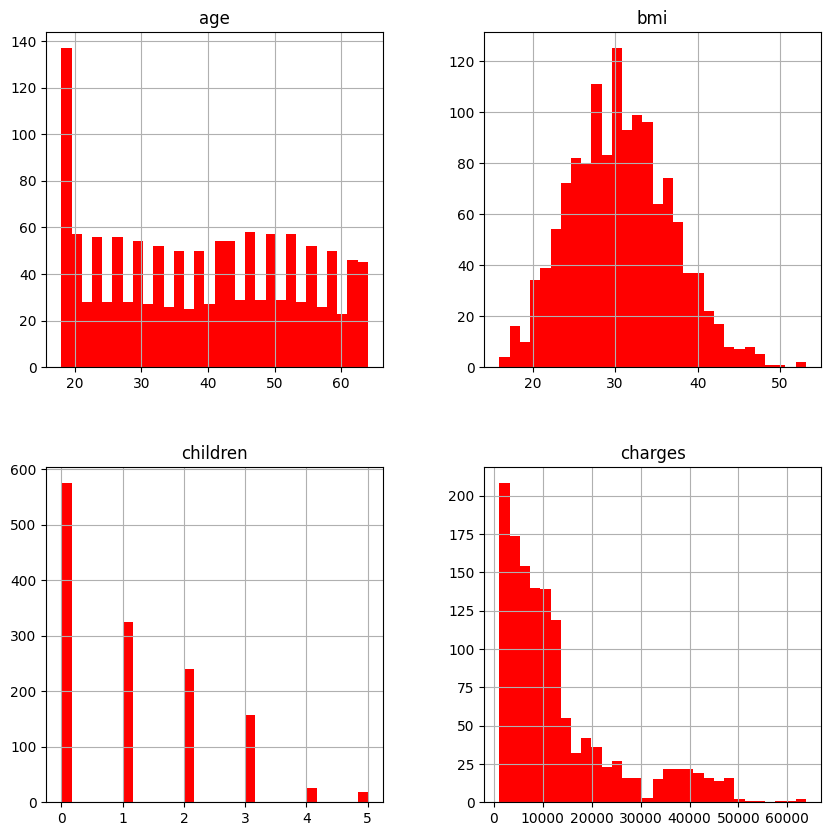

In [18]:
insurance_df[['age', 'bmi', 'children','charges']].hist(bins = 30, figsize = (10, 10), color = 'r')
plt.show()

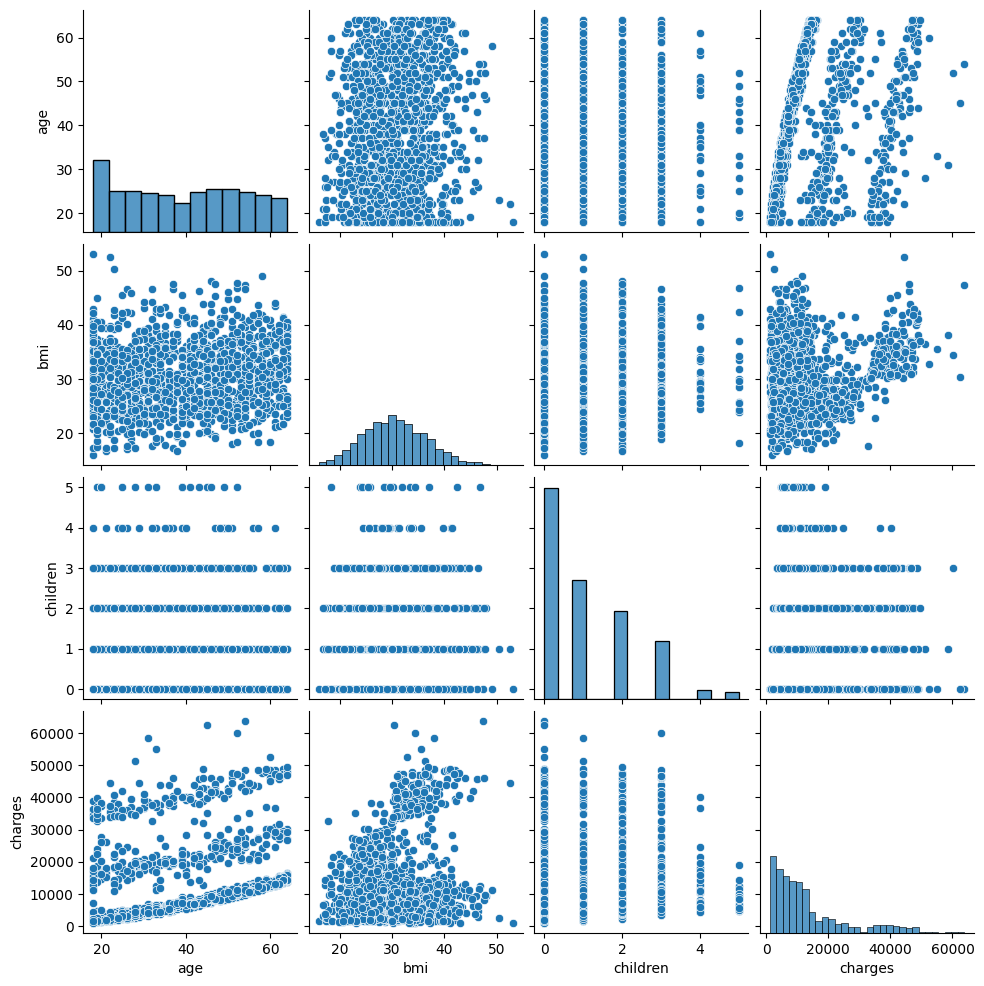

In [20]:
sns.pairplot(insurance_df)

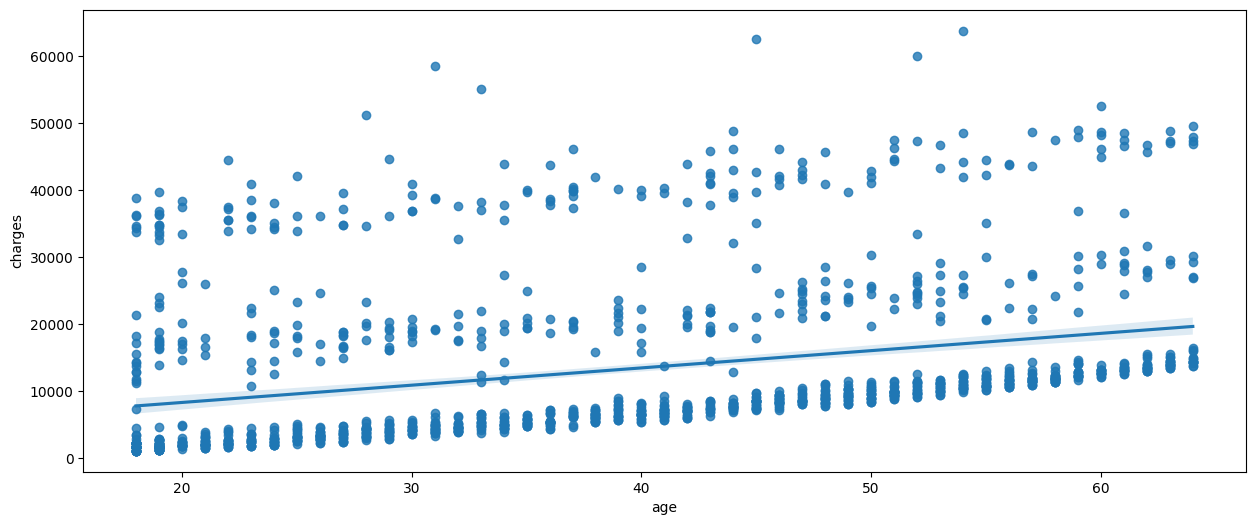

In [21]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = insurance_df) #regplot = regresi plot
plt.show()

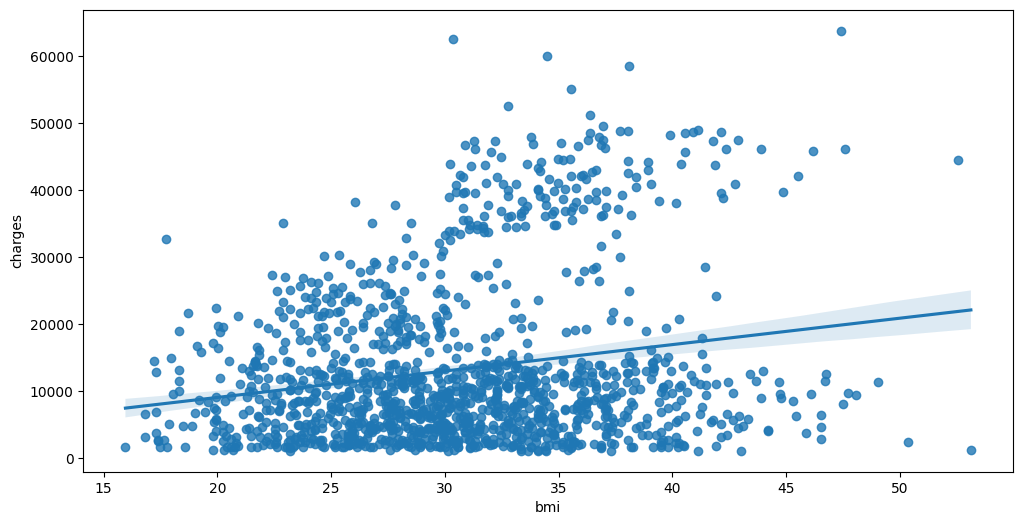

In [23]:
plt.figure(figsize = (12, 6))
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()

<ipython-input-24-acaca2b52b4d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(insurance_df.corr(), annot = True)


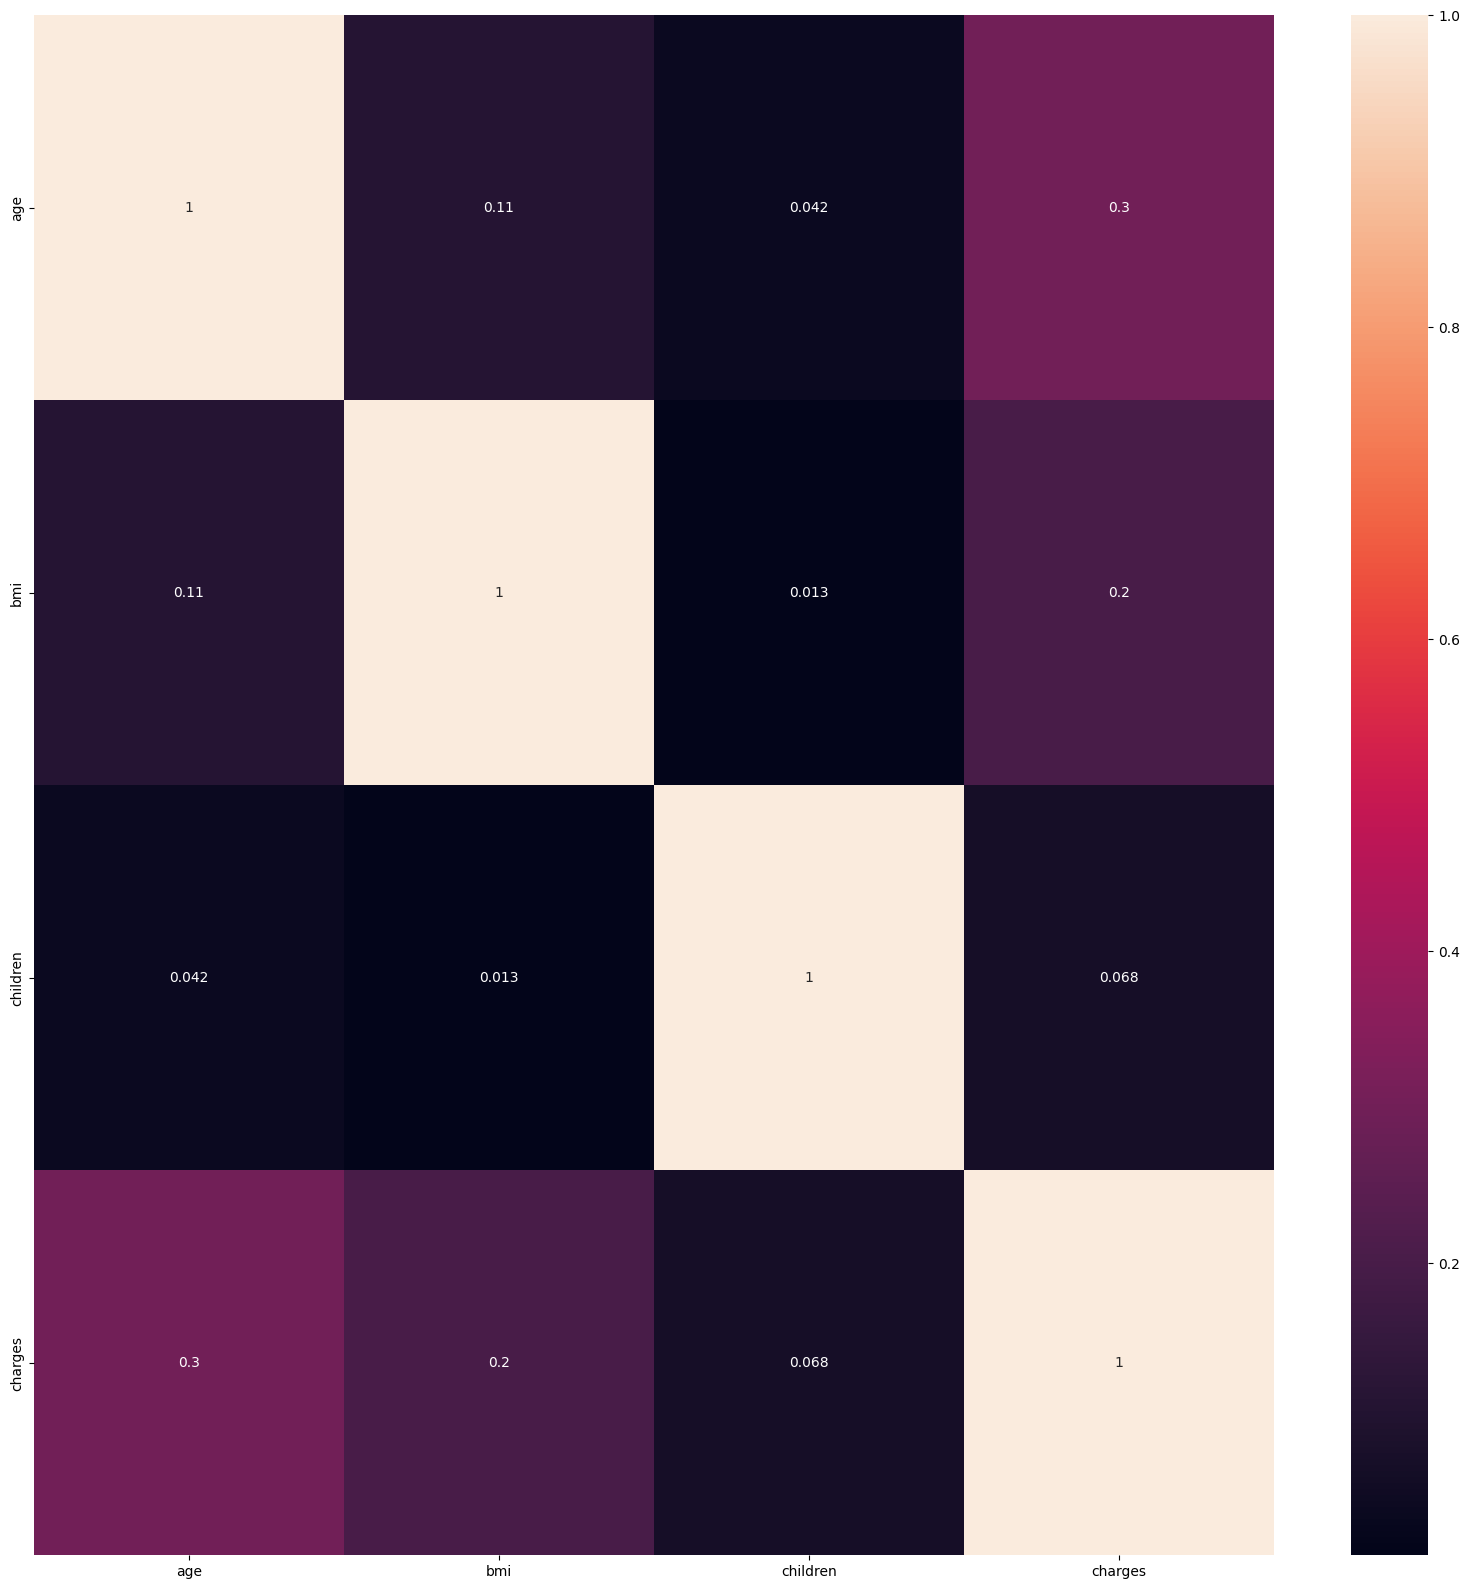

In [24]:
plt.figure(figsize = (20, 20))
sns.heatmap(insurance_df.corr(), annot = True)
plt.show()

In [27]:
#LATIHAN 4
#TRAIN MODEL USING AUTOGLUON
from sklearn.model_selection import train_test_split
#langsung memasukan tanpa memisahkan x dan y train
df_train, df_test = train_test_split(insurance_df, test_size = 0.2, random_state = 0)

In [28]:
df_train

,age,sex,bmi,children,smoker,region,charges
621,37,male,34.100,4,yes,southwest,40182.24600
194,18,male,34.430,0,no,southeast,1137.46970
240,23,female,36.670,2,yes,northeast,38511.62830
1168,32,male,35.200,2,no,southwest,4670.64000
1192,58,female,32.395,1,no,northeast,13019.16105
...,...,...,...,...,...,...,...
763,27,male,26.030,0,no,northeast,3070.80870
835,42,male,35.970,2,no,southeast,7160.33030
1216,40,male,25.080,0,no,southeast,5415.66120
559,19,male,35.530,0,no,northwest,1646.42970


In [29]:
df_test

,age,sex,bmi,children,smoker,region,charges
578,52,male,30.200,1,no,southwest,9724.53000
610,47,female,29.370,1,no,southeast,8547.69130
569,48,male,40.565,2,yes,northwest,45702.02235
1034,61,male,38.380,0,no,northwest,12950.07120
198,51,female,18.050,0,no,northwest,9644.25250
...,...,...,...,...,...,...,...
1084,62,female,30.495,2,no,northwest,15019.76005
726,41,male,28.405,1,no,northwest,6664.68595
1132,57,male,40.280,0,no,northeast,20709.02034
725,30,female,39.050,3,yes,southeast,40932.42950


In [32]:
#latih model regresi ML dgn Autogluon
#menentukan kolom target, train_data, limit_time, dan presets
#autogluon otomatis mendeteksi apakah masalahnya adalah regresi atau klasifikasi pada kolom 'label'
#regresi 'label' berupa floating point, bukan bil bulat dg jumlh nilai unik yg besar
predictor = TabularPredictor(label = 'charges', problem_type = 'regression', eval_metric = 'r2').fit(train_data = df_train, time_limit = 200, presets = 'best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20230612_064757/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels/ag-20230612_064757/"
AutoGluon Version:  0.7.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    1070
Train Data Columns: 6
Label Column: charges
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11161.67 MB
	Train Data (Original)  Memory Usage: 0.23 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			No

In [ ]:
predictor.fit_summary()

In [34]:
#LATIHAN 5
#EVAL KERJA MODEL TERLATIH
predictor.leaderboard()

                    model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L2   0.847428       0.594950  106.743790                0.000814           0.302752            2       True          7
1         CatBoost_BAG_L1   0.846672       0.067240   48.248536                0.067240          48.248536            1       True          6
2     WeightedEnsemble_L3   0.845799       1.498771  182.308726                0.001057           0.222157            3       True         10
3       LightGBMXT_BAG_L2   0.845153       1.428343  148.857884                0.814664          42.400352            2       True          8
4       LightGBMXT_BAG_L1   0.840820       0.079884   27.004874                0.079884          27.004874            1       True          3
5         LightGBM_BAG_L1   0.839615       0.074527   29.071161                0.074527          29.071161            1       True          4
6     

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.847428,0.594950,106.743790,0.000814,0.302752,2,True,7
1,CatBoost_BAG_L1,0.846672,0.067240,48.248536,0.067240,48.248536,1,True,6
2,WeightedEnsemble_L3,0.845799,1.498771,182.308726,0.001057,0.222157,3,True,10
3,LightGBMXT_BAG_L2,0.845153,1.428343,148.857884,0.814664,42.400352,2,True,8
4,LightGBMXT_BAG_L1,0.840820,0.079884,27.004874,0.079884,27.004874,1,True,3
5,LightGBM_BAG_L1,0.839615,0.074527,29.071161,0.074527,29.071161,1,True,4
6,LightGBM_BAG_L2,0.835975,0.683049,139.686216,0.069371,33.228684,2,True,9
7,RandomForestMSE_BAG_L1,0.822728,0.372485,2.116467,0.372485,2.116467,1,True,5
8,KNeighborsUnif_BAG_L1,-0.074486,0.011780,0.008932,0.011780,0.008932,1,True,1
9,KNeighborsDist_BAG_L1,-0.161023,0.007763,0.007562,0.007763,0.007562,1,True,2


                    model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L2   0.847428       0.594950  106.743790                0.000814           0.302752            2       True          7
1         CatBoost_BAG_L1   0.846672       0.067240   48.248536                0.067240          48.248536            1       True          6
2     WeightedEnsemble_L3   0.845799       1.498771  182.308726                0.001057           0.222157            3       True         10
3       LightGBMXT_BAG_L2   0.845153       1.428343  148.857884                0.814664          42.400352            2       True          8
4       LightGBMXT_BAG_L1   0.840820       0.079884   27.004874                0.079884          27.004874            1       True          3
5         LightGBM_BAG_L1   0.839615       0.074527   29.071161                0.074527          29.071161            1       True          4
6     

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'WeightedEnsemble_L2'),
  Text(1, 0, 'CatBoost_BAG_L1'),
  Text(2, 0, 'WeightedEnsemble_L3'),
  Text(3, 0, 'LightGBMXT_BAG_L2'),
  Text(4, 0, 'LightGBMXT_BAG_L1'),
  Text(5, 0, 'LightGBM_BAG_L1'),
  Text(6, 0, 'LightGBM_BAG_L2'),
  Text(7, 0, 'RandomForestMSE_BAG_L1'),
  Text(8, 0, 'KNeighborsUnif_BAG_L1'),
  Text(9, 0, 'KNeighborsDist_BAG_L1')])

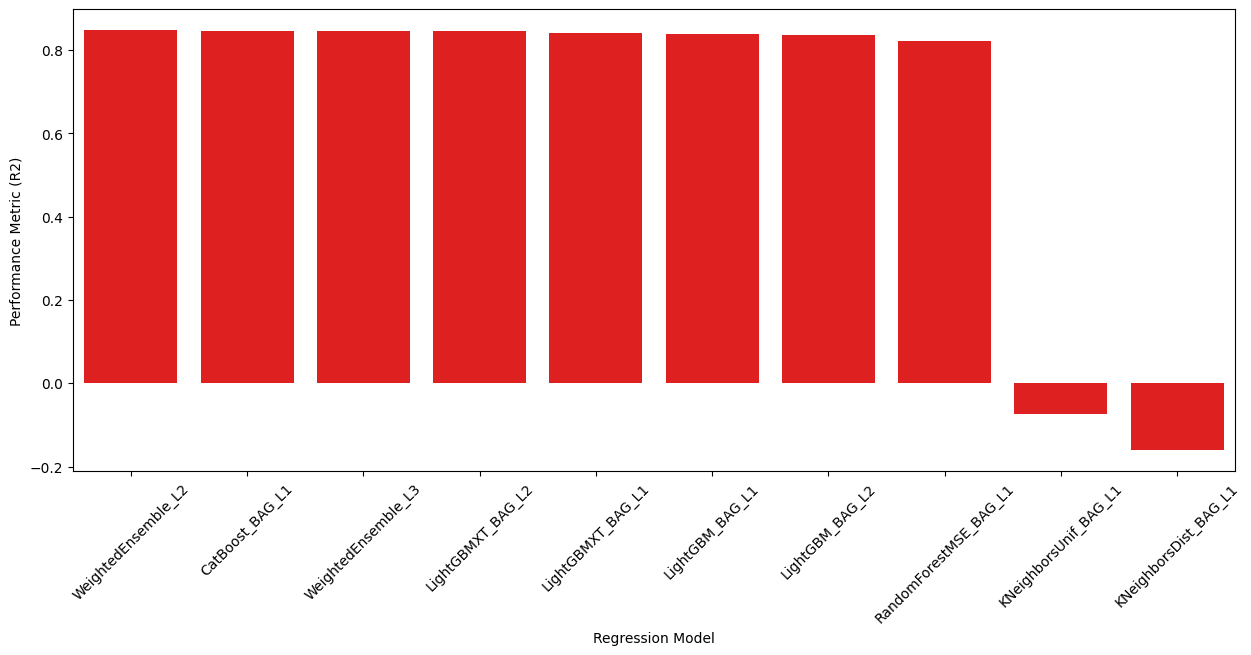

In [37]:
#inisialisasi hasil kedalam bar chart dgn matplotlib
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = 'model', y = 'score_val', data = predictor.leaderboard(), color = 'r')
ax.set(ylabel = 'Performance Metric (R2)', xlabel = 'Regression Model')
plt.xticks(rotation = 45) #membuat label smb x jadi sudut 45

In [38]:
predictor.evaluate(df_test)

/usr/local/lib/python3.10/dist-packages/autogluon/tabular/predictor/predictor.py:1420: FutureWarning: Calling `predictor.predict_proba` when problem_type=regression will raise an AssertionError starting in AutoGluon v0.8. Please call `predictor.predict` instead.
  warnings.warn(
Evaluation: r2 on test data: 0.9038101759915658
Evaluations on test data:
{
    "r2": 0.9038101759915658,
    "root_mean_squared_error": -3912.3756300020614,
    "mean_squared_error": -15306683.070234025,
    "mean_absolute_error": -2379.5067459672923,
    "pearsonr": 0.9515382370533942,
    "median_absolute_error": -1519.578101171875
}


{'r2': 0.9038101759915658,
 'root_mean_squared_error': -3912.3756300020614,
 'mean_squared_error': -15306683.070234025,
 'mean_absolute_error': -2379.5067459672923,
 'pearsonr': 0.9515382370533942,
 'median_absolute_error': -1519.578101171875}

In [39]:
#menilai kerja model
y_pred = predictor.predict(df_test)
print('Predictions:', list(y_pred)[:5])

Predictions: [11504.1669921875, 10182.41796875, 45213.5, 13827.625, 10735.541015625]


In [40]:
df_test

,age,sex,bmi,children,smoker,region,charges
578,52,male,30.200,1,no,southwest,9724.53000
610,47,female,29.370,1,no,southeast,8547.69130
569,48,male,40.565,2,yes,northwest,45702.02235
1034,61,male,38.380,0,no,northwest,12950.07120
198,51,female,18.050,0,no,northwest,9644.25250
...,...,...,...,...,...,...,...
1084,62,female,30.495,2,no,northwest,15019.76005
726,41,male,28.405,1,no,northwest,6664.68595
1132,57,male,40.280,0,no,northeast,20709.02034
725,30,female,39.050,3,yes,southeast,40932.42950


In [41]:
#df test masih mengandung x dan y, untuk mengambil y nya saja maka
y_test = df_test['charges']
y_test

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
1084    15019.76005
726      6664.68595
1132    20709.02034
725     40932.42950
963      9500.57305
Name: charges, Length: 268, dtype: float64

Text(0.5, 0, 'True value')

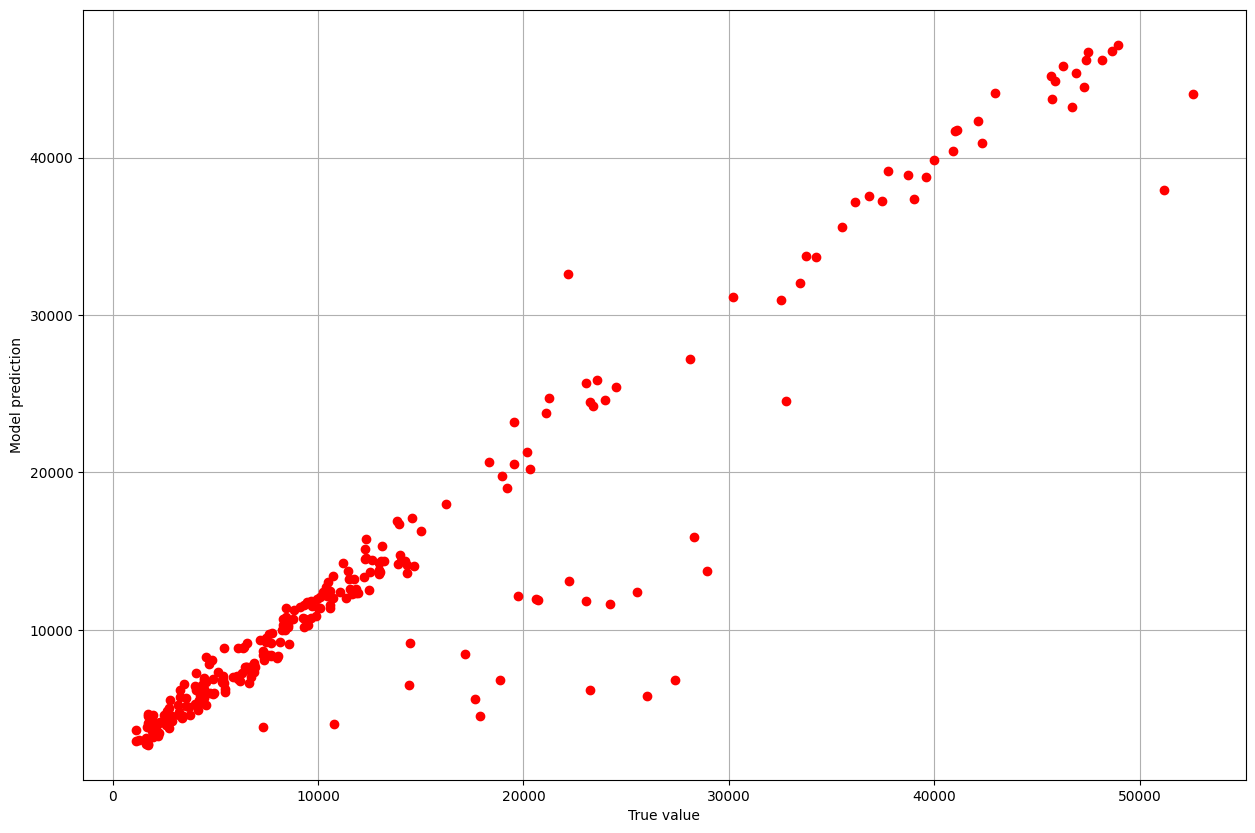

In [45]:
y_predict = predictor.predict(df_test)
plt.figure(figsize = (15, 10))
plt.grid()
plt.plot(y_test, y_predict, 'o', color = 'r') #scatter plot
plt.ylabel('Model prediction')
plt.xlabel('True value')

In [48]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print ('RMSE:', RMSE, '\nMSE:', MSE, '\nMAE:', MAE, '\nr2:', r2) #tanda \n buat enter

RMSE: 3912.376 
MSE: 15306683.070234025 
MAE: 2379.5067459672923 
r2: 0.9038101759915658


In [53]:
#retain model regressor dgn autogluon dg presets berbeda
#limit time 300 s
#eval metric rmse
predictor = TabularPredictor(label = 'charges', problem_type = 'regression', eval_metric = 'rmse').fit(train_data = df_train, time_limit = 300, presets = 'optimize_for_deployment')

No path specified. Models will be saved in: "AutogluonModels/ag-20230612_072541/"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "AutogluonModels/ag-20230612_072541/"
AutoGluon Version:  0.7.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    1070
Train Data Columns: 6
Label Column: charges
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10156.31 MB
	Train Data (Original)  Memory Usage: 0.23 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.


In [54]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model    score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -4593.375965       0.075543  11.620320                0.000931           0.441745            2       True          5
1             CatBoost -4606.663123       0.009103   1.152424                0.009103           1.152424            1       True          2
2       NeuralNetTorch -4727.137435       0.015074   6.577910                0.015074           6.577910            1       True          4
3             LightGBM -4763.082342       0.021415   1.278512                0.021415           1.278512            1       True          1
4      NeuralNetFastAI -4776.217319       0.029019   2.169729                0.029019           2.169729            1       True          3
Number of models trained: 5
Types of models trained:
{'LGBModel', 'NNFastAiTabularModel', 'Weighte

{'model_types': {'LightGBM': 'LGBModel',
  'CatBoost': 'CatBoostModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM': -4763.082342479327,
  'CatBoost': -4606.663123404323,
  'NeuralNetFastAI': -4776.217319191077,
  'NeuralNetTorch': -4727.137434925352,
  'WeightedEnsemble_L2': -4593.375965058885},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM': 'AutogluonModels/ag-20230612_072541/models/LightGBM/',
  'CatBoost': 'AutogluonModels/ag-20230612_072541/models/CatBoost/',
  'NeuralNetFastAI': 'AutogluonModels/ag-20230612_072541/models/NeuralNetFastAI/',
  'NeuralNetTorch': 'AutogluonModels/ag-20230612_072541/models/NeuralNetTorch/',
  'WeightedEnsemble_L2': 'AutogluonModels/ag-20230612_072541/models/WeightedEnsemble_L2/'},
 'model_fit_times': {'LightGBM': 1.2785120010375977,
  'CatBoost': 1.1524240970611572,
  'NeuralNetFastAI': 2.169729471

In [55]:
predictor.leaderboard()

                 model    score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -4593.375965       0.075543  11.620320                0.000931           0.441745            2       True          5
1             CatBoost -4606.663123       0.009103   1.152424                0.009103           1.152424            1       True          2
2       NeuralNetTorch -4727.137435       0.015074   6.577910                0.015074           6.577910            1       True          4
3             LightGBM -4763.082342       0.021415   1.278512                0.021415           1.278512            1       True          1
4      NeuralNetFastAI -4776.217319       0.029019   2.169729                0.029019           2.169729            1       True          3


,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-4593.375965,0.075543,11.620320,0.000931,0.441745,2,True,5
1,CatBoost,-4606.663123,0.009103,1.152424,0.009103,1.152424,1,True,2
2,NeuralNetTorch,-4727.137435,0.015074,6.577910,0.015074,6.577910,1,True,4
3,LightGBM,-4763.082342,0.021415,1.278512,0.021415,1.278512,1,True,1
4,NeuralNetFastAI,-4776.217319,0.029019,2.169729,0.029019,2.169729,1,True,3


                 model    score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -4593.375965       0.075543  11.620320                0.000931           0.441745            2       True          5
1             CatBoost -4606.663123       0.009103   1.152424                0.009103           1.152424            1       True          2
2       NeuralNetTorch -4727.137435       0.015074   6.577910                0.015074           6.577910            1       True          4
3             LightGBM -4763.082342       0.021415   1.278512                0.021415           1.278512            1       True          1
4      NeuralNetFastAI -4776.217319       0.029019   2.169729                0.029019           2.169729            1       True          3


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'WeightedEnsemble_L2'),
  Text(1, 0, 'CatBoost'),
  Text(2, 0, 'NeuralNetTorch'),
  Text(3, 0, 'LightGBM'),
  Text(4, 0, 'NeuralNetFastAI')])

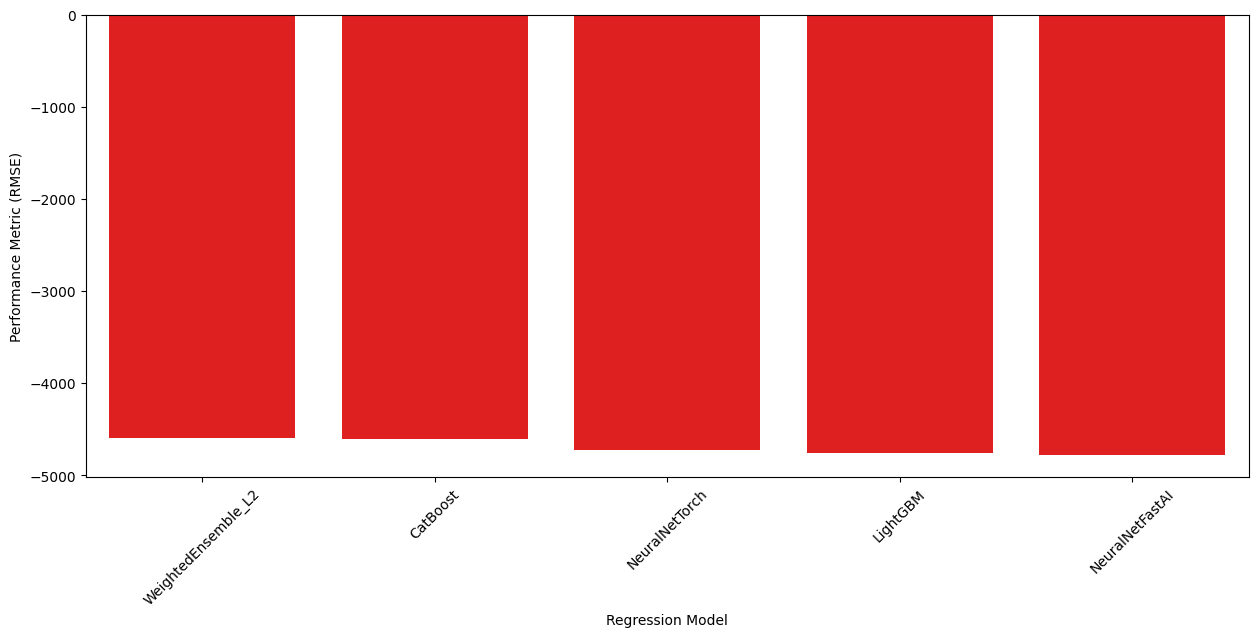

In [56]:
#inisialisasi hasil kedalam bar chart dgn matplotlib
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = 'model', y = 'score_val', data = predictor.leaderboard(), color = 'r')
ax.set(ylabel = 'Performance Metric (RMSE)', xlabel = 'Regression Model')
plt.xticks(rotation = 45) #membuat label smb x jadi sudut 45

In [57]:
predictor.evaluate(df_test)

/usr/local/lib/python3.10/dist-packages/autogluon/tabular/predictor/predictor.py:1420: FutureWarning: Calling `predictor.predict_proba` when problem_type=regression will raise an AssertionError starting in AutoGluon v0.8. Please call `predictor.predict` instead.
  warnings.warn(
Evaluation: root_mean_squared_error on test data: -3943.381621474064
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -3943.381621474064,
    "mean_squared_error": -15550258.61257942,
    "mean_absolute_error": -2328.651208320079,
    "r2": 0.9022795054704962,
    "pearsonr": 0.9503513814283445,
    "median_absolute_error": -1414.6786857421873
}


{'root_mean_squared_error': -3943.381621474064,
 'mean_squared_error': -15550258.61257942,
 'mean_absolute_error': -2328.651208320079,
 'r2': 0.9022795054704962,
 'pearsonr': 0.9503513814283445,
 'median_absolute_error': -1414.6786857421873}

In [58]:
#menilai kerja model
y_pred = predictor.predict(df_test)
print('Predictions:', list(y_pred)[:5])

Predictions: [10641.1865234375, 10161.3837890625, 45269.3359375, 14151.69140625, 11469.7177734375]


578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
1084    15019.76005
726      6664.68595
1132    20709.02034
725     40932.42950
963      9500.57305
Name: charges, Length: 268, dtype: float64

In [60]:
y_test = df_test['charges']
y_test

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
1084    15019.76005
726      6664.68595
1132    20709.02034
725     40932.42950
963      9500.57305
Name: charges, Length: 268, dtype: float64

Text(0.5, 0, 'True value')

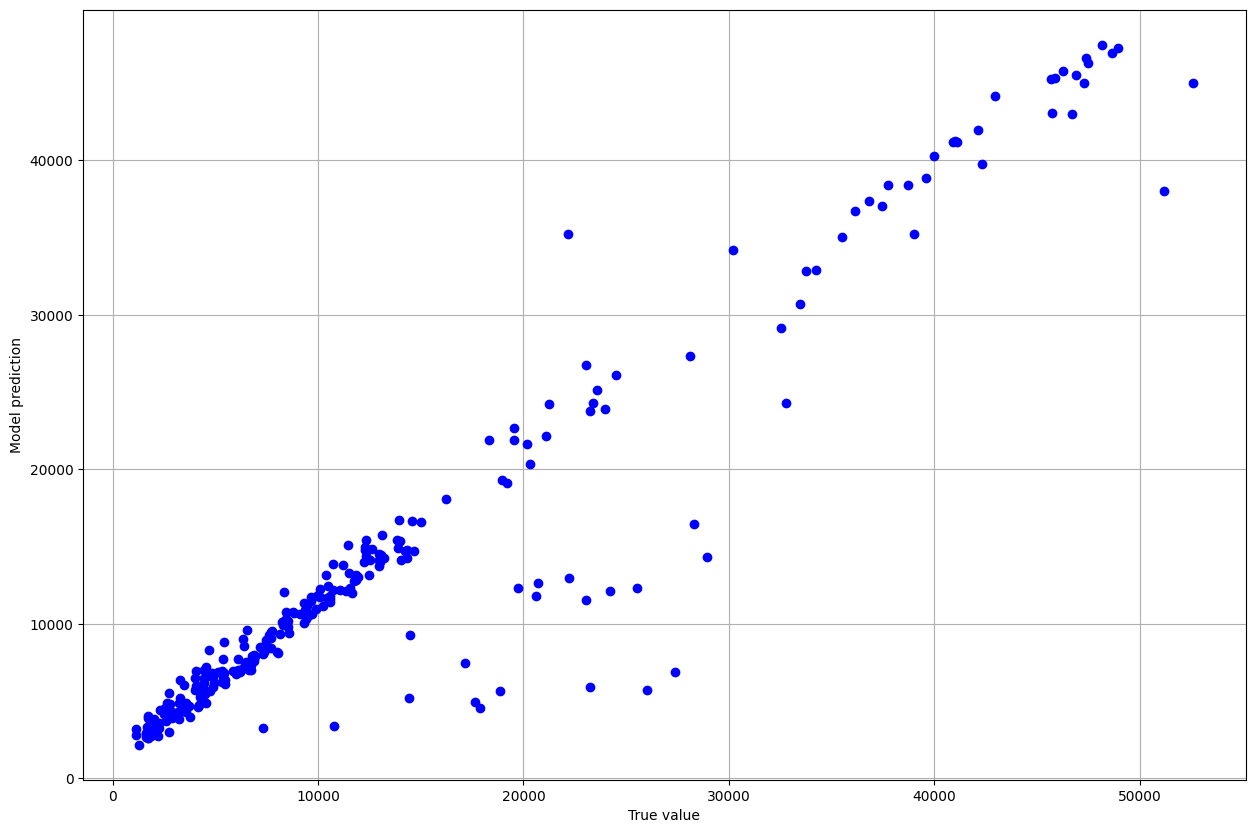

In [62]:
y_predict = predictor.predict(df_test)
plt.figure(figsize = (15, 10))
plt.grid()
plt.plot(y_test, y_predict, 'o', color = 'b') #scatter plot
plt.ylabel('Model prediction')
plt.xlabel('True value')

In [63]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print ('RMSE:', RMSE, '\nMSE:', MSE, '\nMAE:', MAE, '\nr2:', r2) #tanda \n buat enter

RMSE: 3943.382 
MSE: 15550258.61257942 
MAE: 2328.651208320079 
r2: 0.9022795054704962


In [ ]:
#FINISH